Code:

```
import cv2
import sys
import numpy

PREVIEW  = 0  # Preview Mode
BLUR     = 1  # Blurring Filter
FEATURES = 2  # Corner Feature Detector
CANNY    = 3  # Canny Edge Detector

feature_params = dict(maxCorners=500, qualityLevel=0.2, minDistance=15, blockSize=9)
s = 0
if len(sys.argv) > 1:
    s = sys.argv[1]

image_filter = PREVIEW
alive = True

win_name = "Camera Filters"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
result = None

source = cv2.VideoCapture(s)

while alive:
    has_frame, frame = source.read()
    if not has_frame:
        break

    frame = cv2.flip(frame, 1)

    if image_filter == PREVIEW:
        result = frame
    elif image_filter == CANNY:
        result = cv2.Canny(frame, 80, 150)
    elif image_filter == BLUR:
        result = cv2.blur(frame, (13, 13))
    elif image_filter == FEATURES:
        result = frame
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners = cv2.goodFeaturesToTrack(frame_gray, **feature_params)
        if corners is not None:
            for x, y in numpy.float32(corners).reshape(-1, 2):
                cv2.circle(result, (x, y), 10, (0, 255, 0), 1)

    cv2.imshow(win_name, result)

    key = cv2.waitKey(1)
    if key == ord("Q") or key == ord("q") or key == 27:
        alive = False
    elif key == ord("C") or key == ord("c"):
        image_filter = CANNY
    elif key == ord("B") or key == ord("b"):
        image_filter = BLUR
    elif key == ord("F") or key == ord("f"):
        image_filter = FEATURES
    elif key == ord("P") or key == ord("p"):
        image_filter = PREVIEW

source.release()
cv2.destroyWindow(win_name)```



## Questions

#### 1. Which of the following is not a blurring filter in OpenCV?

- Canny Filter

ref.:

https://www.geeksforgeeks.org/python-image-blurring-using-opencv/

#### 2. Which of the following is true about the Bilateral Filter in OpenCV?

- It can reduce unwanted noise while keeping edges fairly sharp

ref.:

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

#### 3. In which field can the Canny Edge Detector be used?

- Medical Imaging
- Robotics
- Computer Vision
- All of the above - correct

ref.:

https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html?ref=blog.roboflow.com



#### 4. How does `cv2.goodFeaturesToTrack` detect corners?

- It looks for areas where the structure tensor has a small eigenvalue

ref.:

https://docs.opencv.org/4.x/d4/d8c/tutorial_py_shi_tomasi.html

https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541

#### 5. What is the function of `cv2.blur()` in OpenCV?

- It applies an average blurring filter to an image.

ref.:

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html



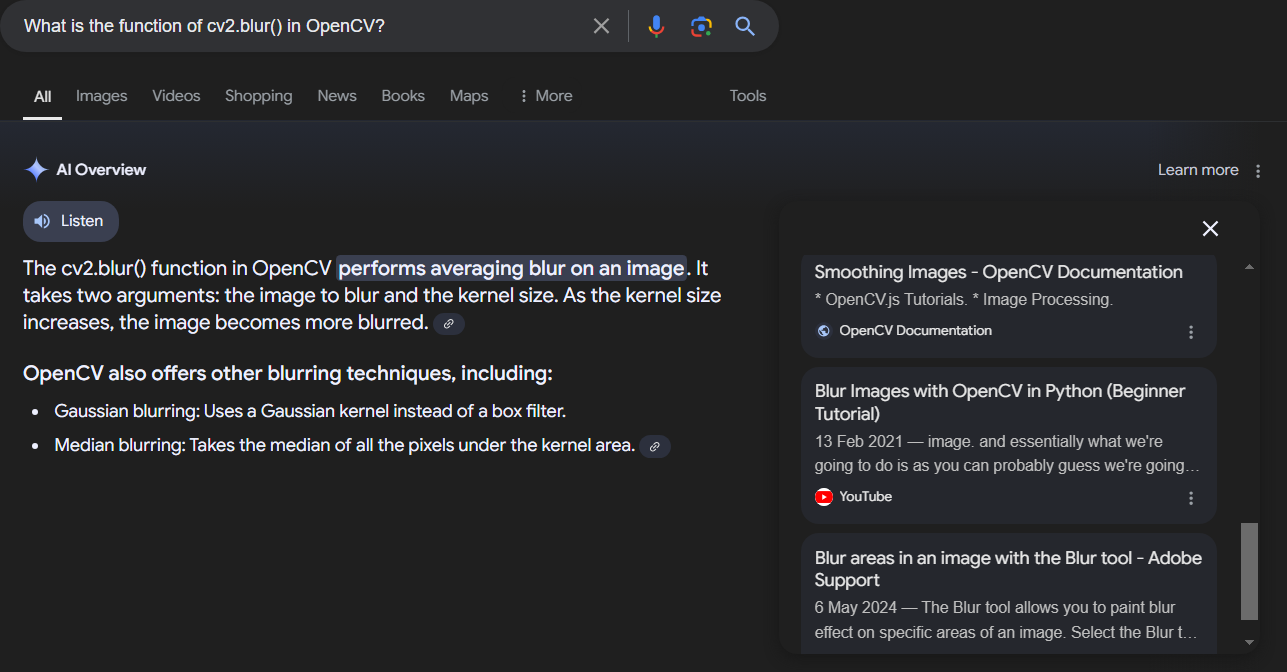